In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

 

In [2]:
df = pd.read_csv("/home/aum/Downloads/DataSets/new_data/infosys_data.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 02, 2020",1072.30,1065.00,1079.95,1051.10,7180000,1.10%
1,"Nov 03, 2020",1062.55,1072.00,1079.40,1057.50,7200000,-0.91%
2,"Nov 04, 2020",1093.95,1068.00,1116.00,1066.80,15700000,2.96%
3,"Nov 05, 2020",1104.00,1109.90,1123.00,1099.00,9570000,0.92%
4,"Nov 06, 2020",1112.75,1108.00,1121.10,1091.70,8810000,0.79%
...,...,...,...,...,...,...,...
56,"Jan 22, 2021",1340.85,1327.00,1356.00,1326.55,9650000,0.09%
57,"Jan 25, 2021",1325.10,1345.00,1347.90,1313.00,6540000,-1.17%
58,"Jan 27, 2021",1301.00,1319.60,1327.55,1285.10,8130000,-1.82%
59,"Jan 28, 2021",1276.20,1291.80,1296.45,1272.55,4660000,-1.91%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      61 non-null     object 
 1   Price     61 non-null     float64
 2   Open      61 non-null     float64
 3   High      61 non-null     float64
 4   Low       61 non-null     float64
 5   Vol.      61 non-null     int64  
 6   Change %  61 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 3.5+ KB


In [4]:
df[["Price","Open","High","Low","Change %"]] = df[["Price","Open","High","Low","Change %"]].replace({',':'','%':''}, regex = True)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      61 non-null     datetime64[ns]
 1   Price     61 non-null     float64       
 2   Open      61 non-null     float64       
 3   High      61 non-null     float64       
 4   Low       61 non-null     float64       
 5   Vol.      61 non-null     int64         
 6   Change %  61 non-null     object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.5+ KB


In [7]:
df[["Price","Open","High","Low","Vol.","Change %"]] = df[["Price","Open","High","Low","Vol.","Change %"]].apply(pd.to_numeric)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      61 non-null     datetime64[ns]
 1   Price     61 non-null     float64       
 2   Open      61 non-null     float64       
 3   High      61 non-null     float64       
 4   Low       61 non-null     float64       
 5   Vol.      61 non-null     int64         
 6   Change %  61 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.5 KB


In [9]:
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000
mean,1204.540164,1204.256557,1217.699180,1189.463934,1.016213e+07,0.271311
std,92.691865,93.050627,93.206495,91.224164,4.496252e+06,1.784379
min,1062.550000,1065.000000,1079.400000,1051.100000,4.250000e+06,-4.000000
25%,1124.200000,1128.100000,1142.000000,1112.650000,7.200000e+06,-1.050000
50%,1167.750000,1168.050000,1172.600000,1155.250000,8.960000e+06,0.120000
75%,1282.100000,1286.250000,1297.650000,1268.050000,1.096000e+07,0.960000
max,1387.150000,1378.000000,1392.800000,1360.000000,2.752000e+07,4.890000


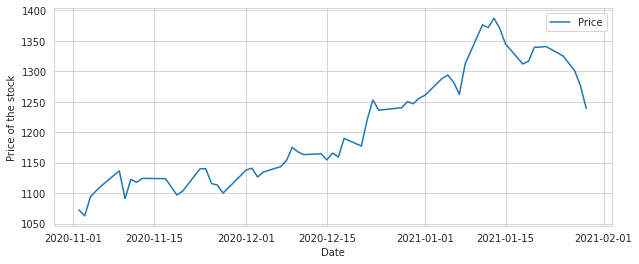

In [10]:
plt.figure(figsize = (10,4))
plt.plot(df.Date,df['Price'])
plt.xlabel("Date")
plt.ylabel("Price of the stock")
plt.legend(['Price'])
plt.show()

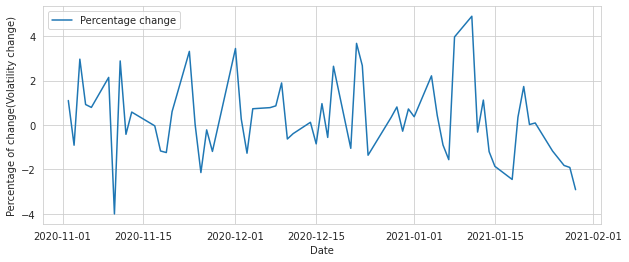

In [11]:
plt.figure(figsize = (10,4))
plt.plot(df.Date,df['Change %'], label = 'Percentage change')
plt.xlabel("Date")
plt.ylabel("Percentage of change(Volatility change)")
plt.legend(['Percentage change'])
plt.show()

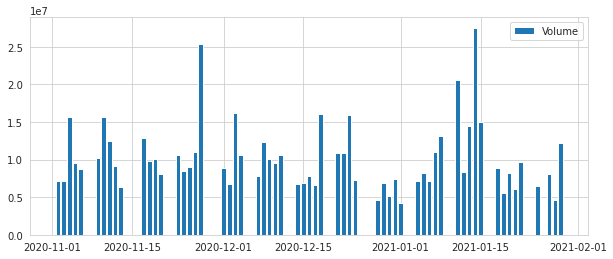

In [12]:
plt.figure(figsize=(10,4))
plt.bar(df.Date,df['Vol.'])
plt.legend(['Volume'])
plt.show()

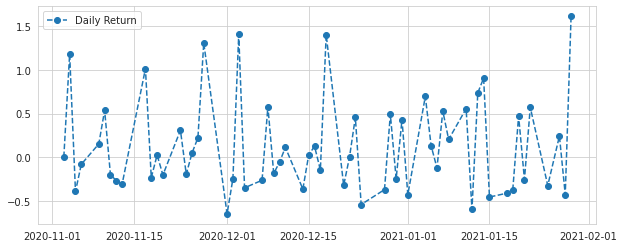

In [13]:
# We'll use pct_change to find the percent change for each day
df['Daily Return'] = df['Vol.'].pct_change()

# Lets plot the daily return percentage
plt.figure(figsize = (10,4))
plt.plot(df['Date'],df['Daily Return'],linestyle='--', marker='o')
plt.legend(['Daily Return'])

/home/aum/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

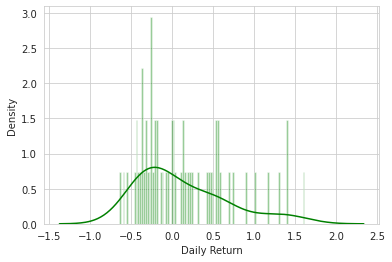

In [14]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(df['Daily Return'].dropna(), bins=100, color='green')

<AxesSubplot:>

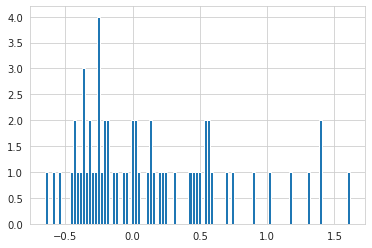

In [15]:
# only with histogram
df['Daily Return'].hist(bins=100)

In [16]:
closingprice_df = df['Vol.']
closingprice_df.head(10)

0     7180000
1     7200000
2    15700000
3     9570000
4     8810000
5    10160000
6    15620000
7    12510000
8     9180000
9     6360000
Name: Vol., dtype: int64

In [17]:
tech_returns = closingprice_df.pct_change()
tech_returns.head()

0         NaN
1    0.002786
2    1.180556
3   -0.390446
4   -0.079415
Name: Vol., dtype: float64

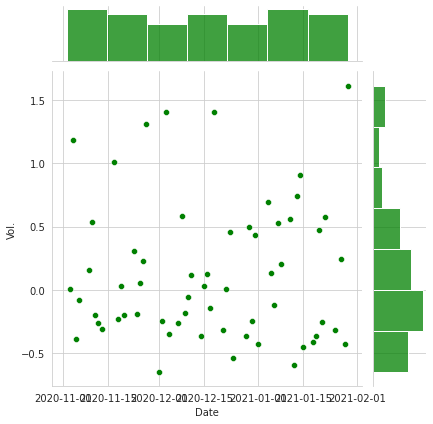

In [18]:
sns.jointplot(x = df['Date'],y = tech_returns,kind='scatter',color='green')

In [19]:
#Building linear regression model
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model supervision
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [20]:
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 


#split the data into train and test sets
X=np.array(df.index).reshape(-1,1)
Y=df['Price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=101)
#feature scaling
scaler=StandardScaler().fit(X_train)

In [21]:
from sklearn.linear_model import LinearRegression
from plotly.graph_objects import layout

In [22]:
#Creating a linear model
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [23]:
# Setting the layout for our plot
layout = go.Layout(
    title='Prices for Infosys',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Prices',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

infosys_data = [{'x':df['Date'], 'y':df['Price']}]
plot = go.Figure(data=infosys_data, layout=layout)

In [24]:
trace0=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode ='lines',
    name ='Predicted'
)
infosys_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2=go.Figure(data=infosys_data, layout=layout)  


In [25]:
iplot(plot)

In [26]:
iplot(plot2)

In [27]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8245728746296171	0.8874758077695141
MSE       1594.4210459238775	830.2615977693927



In [28]:
#Remove date and Adj Close columns
df = df.drop(['Date','Change %','Daily Return'],axis=1)
print('\n\nData after removing Date')
print(df.head())



Data after removing Date
     Price    Open     High     Low      Vol.
0  1072.30  1065.0  1079.95  1051.1   7180000
1  1062.55  1072.0  1079.40  1057.5   7200000
2  1093.95  1068.0  1116.00  1066.8  15700000
3  1104.00  1109.9  1123.00  1099.0   9570000
4  1112.75  1108.0  1121.10  1091.7   8810000


In [29]:
#Split into train and test data
data_X = df.loc[:,df.columns != 'Price']
data_Y = df['Price']
train_X, test_X, train_y, test_y = train_test_split(data_X,data_Y, test_size = 0.25)
print('\n\nTraining Set')
print(train_X.head())
print(train_y.head())



Training Set
      Open     High     Low      Vol.
58  1319.6  1327.55  1285.1   8130000
38  1235.0  1254.45  1235.0   6880000
2   1068.0  1116.00  1066.8  15700000
1   1072.0  1079.40  1057.5   7200000
48  1378.0  1378.00  1360.0   8310000
58    1301.00
38    1250.30
2     1093.95
1     1062.55
48    1371.75
Name: Price, dtype: float64


In [30]:
#Creating the regressor
regressor = LinearRegression()
regressor.fit(train_X,train_y)

LinearRegression()

In [31]:
#Make predictions and evaluate the results
predict_y = regressor.predict(test_X)
print('Prediction Score: ',regressor.score(test_X,test_y))
error = mse(test_y,predict_y)
print('Mean Squared Error: ',error)

Prediction Score:  0.9950979202504182
Mean Squared Error:  37.448523511189244


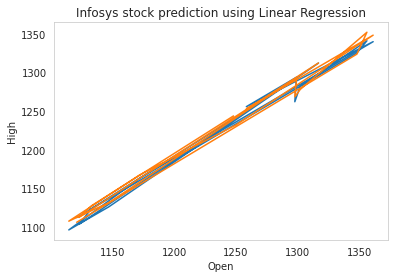

In [32]:
#Plot the predicted and the expected values
fig = plt.figure()
ax = plt.axes()
ax.grid()
ax.set(xlabel = 'Open', ylabel = 'High',title='Infosys stock prediction using Linear Regression')
ax.plot(test_X['High'],test_y)
ax.plot(test_X['High'],predict_y)

plt.show()